# Recommender Systems

Recommender systems are useful for recommending users items based on their past preferences. Recommender systems are generally classified into the following categories:

- **Content-based** based on similarity of item attributes (information about items e.g. keywords, categories, etc. and users (preferences, profiles, etc.). For instance, if a user liked Item 1, the recommender system would recommend items with similar characteristics. If we would talk about movies, those characteristics would include producer, starring actors, genre, run time, release date, etc. Typically, this can be done with a binary classification supervised algorithm.


- **Collaborative filtering**, which calculates similarity from interactions (e.g. ratings, number of purchases, likes, etc.). This process finds customers who have similar preferences, and then gives recommendations to one customer from a set of items that are new to that particular customer and preferred by other customers with a similar profile. The system makes an assumption that users with similar movie watching habits have similar preferences in general. It finds users who watch videos similar to those the user watches, then identifies videos those similar users have watched, but which the first user has not. Finally, it makes recommendations on that basis. There are 3 approaches to this; user-user collaborative filtering, item-item collaborative filtering and matrix factorization.


- New approaches and usually more powerful are **Hybrid systems**, which combine the two aforementioned methods.

<img src="data/image.png">

The above diagram categorises in detail the different methodologies for building a recommender system.

In context to the `movieLens` that will be used later as a sample dataset:
- We will suggest different movies based on the content similarity, e.g. genre, cast, etc. applying an item-content filtering
- We could also compare the user metadata, such as age and gender, and suggest items to the user that similar users have liked. In that case, we would use a user-content filtering. The `movielens` dataset doesn't contain any user content data, so we will build only an item-item collaborative filtering.

__Since we're in an unsupervised setting, we're gonna look at the "Memory Based" methods today__

In memory-based methods there is no model that learns from the data to predict. A pre-computed matrix of similarities is constructed that can be predictive. 

__Load the datasets in three different pandas dataframes__

__remove the '|' that separates the different genres of movies and replace with an empty space__

__Filter data to have only movies that have been rated__

# Feature engineering

We're gonna create a new feature called `metadata`, that gathers all the text data information we have about a movie : the genre and the tags

__Merge the movies and tags data frames__

__Create a new dataframe with the new metadata created, as well as the title of the movie and the movie id__

You should end up with a dataframe like this

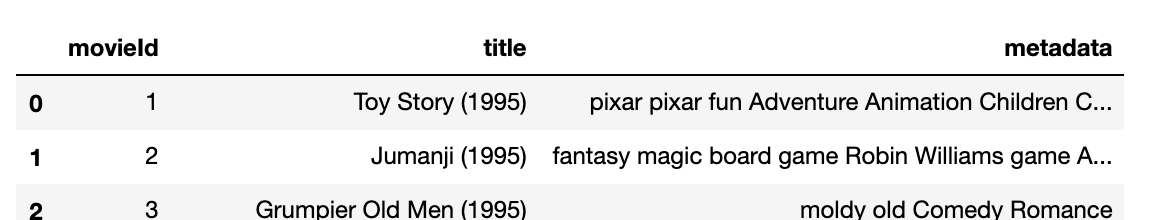

## Create a content matrix from metadata

### Tf-idf

Next we need to transform the metadata text to vectors, in order to feed it to our machine learning algorithms. Machine Learning models don't understand text data so we need to encode it.

We're gonna use the `TfidfVectorizer` to encode the metadata column. 

The new dataframe is gonna have our new tf-idf encoding for every movie

You should end up with a new dataframe for your movies like this

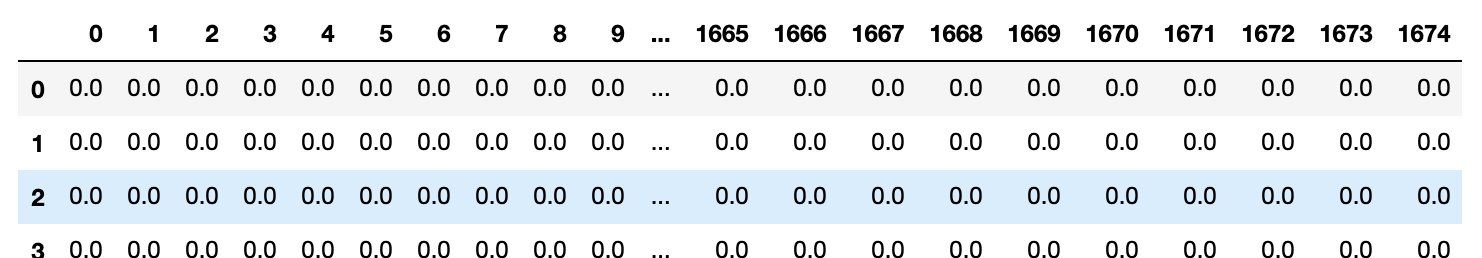

### Dimensionality reduction

Each movie metadata was transformed into a vector of length 1677! (approximately)

As we saw in previous lessons, we can apply dimensionality reduction methods to describe the data (movies) without much loss of information. Truncated singular value decomposition (SVD) is another advanced tool to reduce dimensions.

Contrary to PCA, this estimator does not center the data before computing the singular value decomposition. This means it can work with scipy.sparse matrices efficiently. In particular, truncated SVD works on term count/tf-idf matrices. In that context, it is known as latent semantic analysis (LSA).

You can look at `TruncatedSVD` class in scikit learn but it's the same principle as PCA

__apply the truncated SVD to a number of components (say 25) to reduce the dimension of your tf idf matrix__

You can plot the explained variance ratio to see what is the optimal number of components

We can see that with only the first 25 components (from initially about 1700) we can explain more than 80% of the variance, which suffices for our study purposes.

__You can create now a 'latent' dataframe, which comprise the first 25 components of your reduced data__

"Latent" means in a reduced dimensional shape.

The dimension of this dataframe should now be (9724, 25)

## Create a latent matrix from user ratings

Except from the metadata we have another valuable source of information, __the user ratings__. A recommender system can recommend a movie that is similar on the basis of user ratings (__item-item collaborative filtering__).

You can now __pivot your dataframe__ to have `userIds` as columns, `movieIds` as index and `ratings` as values in the dataframe.

__Replace missing ratings with zeros__

You should end up with a new dataframe for your ratings like this

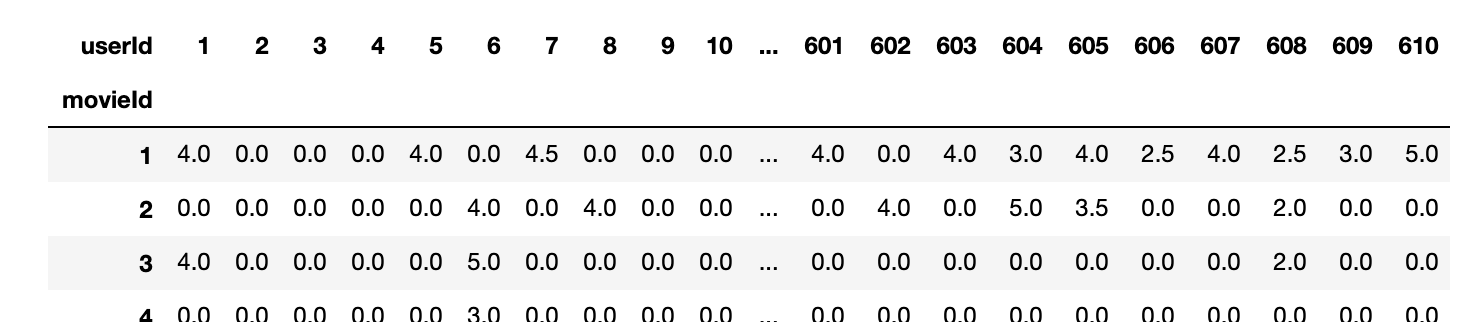

Now, we created a dataset with movies as vectors of length 610.

__Once again, we will apply SVD, so as to keep only the first 200 components__
You can also look at the plot of explained variance

## Apply cosine similarity in content and colaborative matrices

Next, we will use a similarity measure so as to find the top $N$ most similar movies to "Toy Story" based on the filtering methods we created. Cosine similarity is one of the similarity measures we can use (`sklearn.metrics.pairwise.cosine_similarity`)

__Calculate the cosine similarity of a sample movie ("Toy Story (1995)") to both content and collaborative latent (=reduced) matrices you just created.__

We can also create a hybrid filter, which is an average measure of similarity from both content and collaborative filtering. 

`hybrid-similarity = (content-similarity + collab-similarity) / 2`

__Calculate the average similarity of both content and collaborative__

__Create a dataframe with those 3 final similarities to Toy Story__

This new dataframe has all the similarities to Toy Story movie. It should look something like this

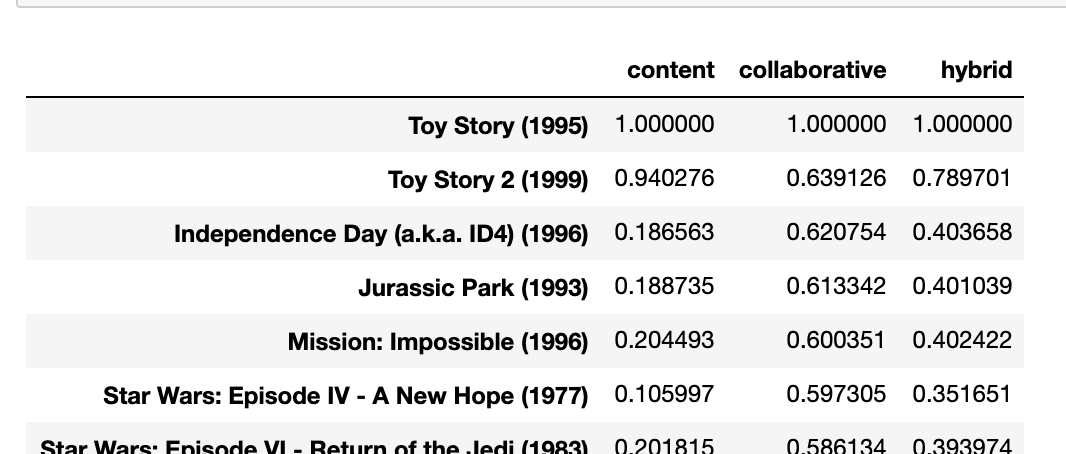

__Sort your dataframe by most similar in terms of collaborative similarity__

You should see Toy Story as the most similar movie of course (similarity of 1 for every column)

__You can sort on contant as well as hybrid and see which one gives the best recommentation__